In [3]:
from deap import creator, base, algorithms, gp, tools
import random
import matplotlib.pyplot as plt
import seaborn as sns

# OneMax problem - the hard way
(from Hands-On Genetic Programming with Python by Eyal Wirsansky)

In [6]:
ONEMAX_LENGTH = 100
POP_SIZE = 200
P_CROSSOVER = 0.9
P_MUTATION = 0.1
MAX_GENERATIONS = 50

toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONEMAX_LENGTH)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [14]:
def oneMaxFitness(individual):
    return sum(individual),

toolbox.register("evaluate", oneMaxFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1/ONEMAX_LENGTH)


- Generation 1: max = 64.0 mean = 54.94
Best: 90
- Generation 2: max = 67.0 mean = 57.83
Best: 12
- Generation 3: max = 71.0 mean = 60.74
Best: 22
- Generation 4: max = 74.0 mean = 63.56
Best: 72
- Generation 5: max = 75.0 mean = 66.63
Best: 136
- Generation 6: max = 78.0 mean = 69.025
Best: 102
- Generation 7: max = 78.0 mean = 71.48
Best: 165
- Generation 8: max = 79.0 mean = 73.335
Best: 10
- Generation 9: max = 80.0 mean = 75.69
Best: 6
- Generation 10: max = 82.0 mean = 77.185
Best: 19
- Generation 11: max = 84.0 mean = 78.755
Best: 147
- Generation 12: max = 87.0 mean = 80.325
Best: 167
- Generation 13: max = 88.0 mean = 82.105
Best: 138
- Generation 14: max = 89.0 mean = 83.985
Best: 103
- Generation 15: max = 90.0 mean = 85.74
Best: 138
- Generation 16: max = 90.0 mean = 87.24
Best: 48
- Generation 17: max = 90.0 mean = 88.225
Best: 3
- Generation 18: max = 91.0 mean = 89.075
Best: 48
- Generation 19: max = 92.0 mean = 89.735
Best: 44
- Generation 20: max = 92.0 mean = 90.165
B

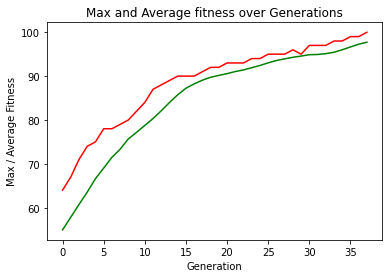

In [16]:
def evolve(toolbox):
    population = toolbox.populationCreator(n=POP_SIZE)
    generationCounter = 0
    fitnessValues = list(map(toolbox.evaluate, population))
    for individual, fitnessValue in zip(population, fitnessValues):
        individual.fitness.values = fitnessValue

    fitnessValues = [individual.fitness.values[0] for individual in population]
    maxFitnessValues = []
    meanFitnessValues = []
    while max(fitnessValues) < ONEMAX_LENGTH and generationCounter < MAX_GENERATIONS:
        generationCounter += 1
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
                
        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
        for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
            individual.fitness.values = fitnessValue
        population[:] = offspring
        fitnessValues = [ind.fitness.values[0] for ind in population]
        maxFitness = max(fitnessValues)
        meanFitness = sum(fitnessValues) / len(population)
        maxFitnessValues.append(maxFitness)
        meanFitnessValues.append(meanFitness)
        print(f"- Generation {generationCounter}: max = {maxFitness} mean = {meanFitness}")
        best_index = fitnessValues.index(max(fitnessValues))
        print(f"Best: {best_index}")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')
    plt.show()

evolve(toolbox)

# OneMax the easy way

In [28]:
import numpy as np

HOF_SIZE = 10
hof = tools.HallOfFame(HOF_SIZE)
population = toolbox.populationCreator(n=POP_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("mean", np.mean)
population, logbook = algorithms.eaSimple(
    population,
    toolbox,
    cxpb=P_CROSSOVER,
    mutpb=P_MUTATION,
    ngen=MAX_GENERATIONS,
    halloffame=hof,
    stats=stats,
    verbose=True
)


gen	nevals	max	mean  
0  	200   	65 	49.915
1  	172   	67 	53.775
2  	185   	70 	57.4  
3  	181   	72 	60.79 
4  	185   	74 	64.295
5  	192   	76 	67.29 
6  	167   	77 	70.155
7  	180   	80 	72.59 
8  	183   	80 	75.035
9  	181   	82 	76.82 
10 	182   	84 	78.58 
11 	178   	86 	80.285
12 	175   	87 	81.615
13 	173   	88 	83.215
14 	175   	88 	84.55 
15 	174   	89 	85.895
16 	184   	89 	86.72 
17 	174   	89 	87.39 
18 	182   	90 	87.87 
19 	184   	91 	88.42 
20 	175   	91 	88.975
21 	187   	93 	89.495
22 	182   	93 	90.115
23 	200   	93 	90.75 
24 	186   	93 	91.525
25 	185   	94 	92.16 
26 	184   	94 	92.735
27 	183   	95 	93.27 
28 	182   	95 	93.795
29 	174   	96 	94.125
30 	183   	96 	94.34 
31 	195   	97 	94.73 
32 	179   	97 	95.095
33 	184   	97 	95.465
34 	175   	97 	95.805
35 	186   	97 	96.01 
36 	180   	97 	96.235
37 	177   	97 	96.565
38 	184   	97 	96.87 
39 	187   	97 	96.885
40 	183   	98 	96.885
41 	186   	98 	96.9  
42 	181   	98 	96.965
43 	186   	98 	96.995
44 	185   

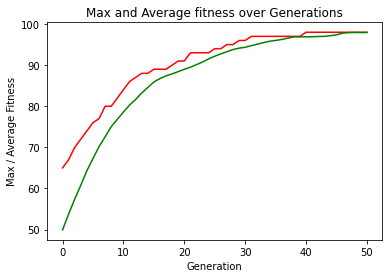

In [29]:
maxFitnessValues, meanFitnessValues = logbook.select("max", "mean")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()

In [25]:
print(hof.items[0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Genetic Programming example
(from the same book)